# Spotify Skip Classification Project


#### Our team is going to solve a classification problem that predicts whether a particular user will skip certain tracks during a listening session based on the Spotify public dataset of user behavior.

## Data Analysis

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import random
from collections import Counter


In [2]:
df = pd.read_csv("sample_data/log_mini.csv")
df.head()


,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone


### Data pre-processing

##### Bool to int variables

Re-express the target variable from bool to int.

In [3]:
df['skipped'] = ~df['not_skipped']
df.drop('not_skipped', axis=1, inplace=True)
df = df.replace({True: 1, False: 0})
df.describe()


,session_position,session_length,skip_1,skip_2,skip_3,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,premium,skipped
count,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000
mean,9.325911,17.651823,0.421503,0.517179,0.648380,0.040904,0.767602,0.146635,0.172832,0.038909,0.046259,0.308732,14.193084,0.810418,0.667119
std,5.457638,3.422025,0.493801,0.499706,0.477478,0.198069,0.422363,0.353742,0.378103,0.367295,0.606558,0.461972,5.996243,0.391971,0.471246
min,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,15.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,1.000000,0.000000
50%,9.000000,20.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,1.000000,1.000000
75%,14.000000,20.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,1.000000,1.000000
max,20.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,60.000000,151.000000,1.000000,23.000000,1.000000,1.000000


The initial analysis over the target variable shows that 66% of the songs are skipped at some point. 42% of the tracks are only played very briefly (dataset description doesn't specifies what does very briefly means).

In [4]:
df.drop("session_length", axis=1, inplace=True)
df.drop("hist_user_behavior_reason_end", axis=1, inplace=True)

# New features: Shift seek variables from previous to current track
df = df.sort_values(by=['session_id', 'session_position'], ascending=True)
df['hist_user_behavior_n_seekfwd'] = df.groupby(['session_id'])['hist_user_behavior_n_seekfwd'].shift(1)
df['hist_user_behavior_n_seekfwd'] = df['hist_user_behavior_n_seekfwd'].fillna(0).astype('int64')

df['hist_user_behavior_n_seekback'] = df.groupby(['session_id'])['hist_user_behavior_n_seekback'].shift(1)
df['hist_user_behavior_n_seekback'] = df['hist_user_behavior_n_seekback'].fillna(0).astype('int64')


##### Date-time variables

We have analyzed the time of the day effect. The skipped rate seem to increase after lunch time. We will remove the `date` field.

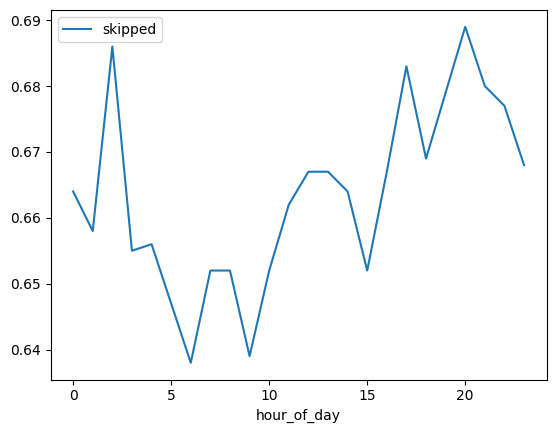

In [5]:
df[["skipped", "hour_of_day"]].groupby(["hour_of_day"]).mean().round(3).plot()
df.drop("date", axis=1, inplace=True)


In [6]:
df.corr()

<ipython-input-6-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,session_position,skip_1,skip_2,skip_3,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,premium,skipped
session_position,1.000000,0.055365,0.040010,0.001222,-0.020918,0.194384,0.027115,0.023199,-0.024474,-0.015540,0.012484,-0.004032,0.023865,-0.005463
skip_1,0.055365,1.000000,0.824751,0.628597,-0.094305,0.191440,-0.129213,-0.163313,-0.010183,-0.002979,0.052393,0.011958,-0.027076,0.602966
skip_2,0.040010,0.824751,1.000000,0.762141,-0.073632,0.105180,-0.033340,-0.073393,0.012220,-0.000048,0.048836,0.009774,-0.016049,0.731088
skip_3,0.001222,0.628597,0.762141,1.000000,-0.042541,-0.064818,0.117503,0.081010,0.023529,0.002975,0.033876,0.013727,-0.004615,0.959225
context_switch,-0.020918,-0.094305,-0.073632,-0.042541,1.000000,0.003908,0.009697,0.028170,0.036080,0.011744,-0.045769,-0.002287,0.023390,-0.035617
no_pause_before_play,0.194384,0.191440,0.105180,-0.064818,0.003908,1.000000,-0.753359,-0.830743,0.006139,0.000577,-0.017914,-0.013401,0.010235,-0.080246
short_pause_before_play,0.027115,-0.129213,-0.033340,0.117503,0.009697,-0.753359,1.000000,0.906850,0.002138,0.004323,0.030871,0.014678,0.027277,0.126978
long_pause_before_play,0.023199,-0.163313,-0.073393,0.081010,0.028170,-0.830743,0.906850,1.000000,0.009498,0.011009,0.022136,0.014715,-0.008371,0.092755
hist_user_behavior_n_seekfwd,-0.024474,-0.010183,0.012220,0.023529,0.036080,0.006139,0.002138,0.009498,1.000000,0.270973,-0.018941,-0.006136,-0.008471,0.023994
hist_user_behavior_n_seekback,-0.015540,-0.002979,-0.000048,0.002975,0.011744,0.000577,0.004323,0.011009,0.270973,1.000000,-0.025344,-0.002132,-0.006916,0.002524


After reading the correlation table, we can see that the none of the variables have strong correlation with the target value. The most important variables are:
    
    1. Short pause before play with 0.126
    2. Long pause before play with 0.092
    3. No pause before play -0.080

We dont't have strong correlation among the explanatory variables, except for short and long pause. This menas that even if those are the most relevant variables to explain if a song will be skipped their predictive power will be reduced if both are used.

The next question we would like to answer is if users skip songs evenly during the whole session. The following chart shows that during the third and nine track the percentage of skips is reduced up to 4%.

<Axes: xlabel='session_position', ylabel='skipped'>

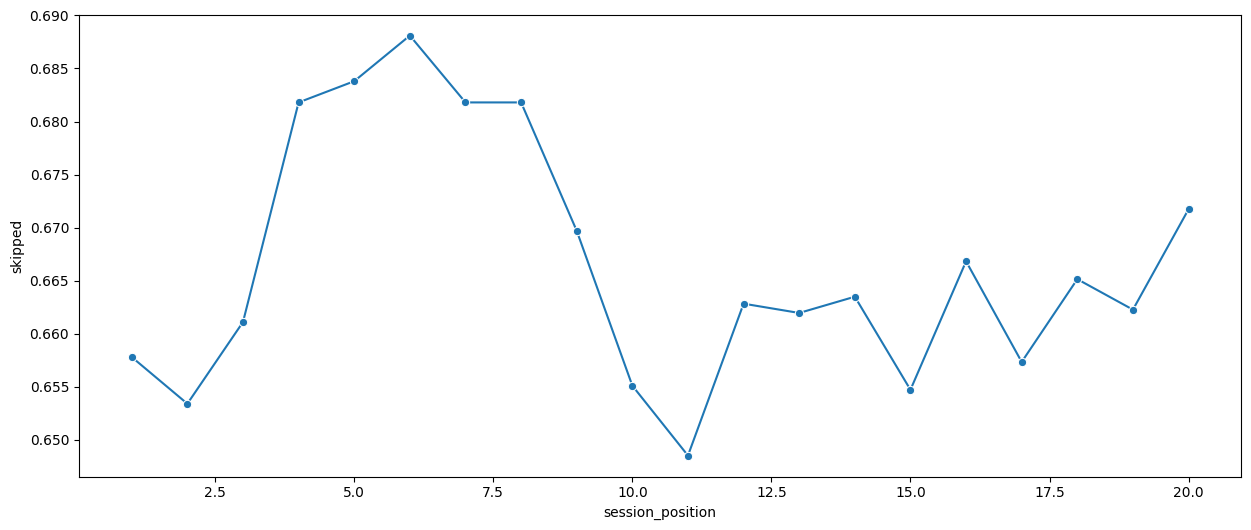

In [7]:
session_pos_df = df[['session_position', 'skipped']]
session_pos_df = session_pos_df.groupby('session_position').mean().stack().reset_index()
session_pos_df.columns = ['session_position', 'event', 'skipped']

plt.figure(figsize=(15,6))
sns.lineplot(x="session_position", y="skipped", data=session_pos_df, marker="o")

Since this variables seems to have low predictive power we would like to extract new variables from the dataset.

In [8]:
df = df.sort_values(by=['session_id', 'session_position'], ascending=True)

# New features: Previous song was skiped
df['previous_skipped'] = df.groupby(['session_id'])['skipped'].shift(1)
df['previous_skipped'] = df['previous_skipped'].fillna(0).astype('int64')

# New features: Count previous skips in session
df['previous_skipped_count'] = df.groupby(['session_id'])['previous_skipped'].cumsum()
df['previous_skipped_count'] = df['previous_skipped_count'].fillna(0).astype('int64')


In [9]:
tf = pd.read_csv("sample_data/tf_mini.csv")

df = pd.merge(df, tf, left_on="track_id_clean", right_on="track_id", how="left")

df.drop("track_id_clean", axis=1, inplace=True)
df.drop("track_id", axis=1, inplace=True)

df.head()

,session_id,session_position,skip_1,skip_2,skip_3,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,0,0,0,0,0,0,0,0,...,4,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,0,0,0,0,1,0,0,0,...,4,0.337152,-0.713646,0.363718,0.310315,-0.042222,-0.383164,0.066357,-0.365308,0.157920
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,0,0,0,0,1,0,0,0,...,4,0.373862,-0.742541,0.375599,0.252660,-0.049007,-0.299745,0.063341,-0.486689,0.181604
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,0,0,0,0,1,0,0,0,...,4,0.649420,-0.705116,0.317562,0.289141,-0.038920,-0.393358,0.092719,-0.364418,0.285603
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,0,0,0,0,1,0,0,0,...,4,0.652921,-0.868489,0.331280,0.210478,0.084740,-0.333287,-0.025706,-0.510350,0.182315


Due to the intertemporal character of the problem we will create a laged version for every track characteristic.

In [10]:
track_columns = ['duration', 'release_year', 'us_popularity_estimate',
       'acousticness', 'beat_strength', 'bounciness', 'danceability',
       'dyn_range_mean', 'energy', 'flatness', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mechanism', 'organism', 'speechiness',
       'tempo', 'time_signature', 'valence', 'acoustic_vector_0',
       'acoustic_vector_1', 'acoustic_vector_2', 'acoustic_vector_3',
       'acoustic_vector_4', 'acoustic_vector_5', 'acoustic_vector_6',
       'acoustic_vector_7']

for var in track_columns:
    df[var + '_lag'] = df.groupby(['session_id'])[var].shift(1)
    df[var + '_lag'] = df[var + '_lag'].fillna(df[var]).astype('int64')


##### Prepare dataset for models

In [11]:
df.drop("skip_1", axis=1, inplace=True)
df.drop("skip_2", axis=1, inplace=True)
df.drop("skip_3", axis=1, inplace=True)
df.drop("session_id", axis=1, inplace=True)


In [12]:
context_type = pd.get_dummies(df['context_type'], prefix='context_type', drop_first=True)
hist_user_behavior_reason_start = pd.get_dummies(df['hist_user_behavior_reason_start'], prefix='hist_user_behavior_reason_start', drop_first=True)
mode = pd.get_dummies(df['mode'], prefix='mode', drop_first=True)

df = pd.concat([df, context_type, hist_user_behavior_reason_start, mode], axis=1)

df.drop("context_type", axis=1, inplace=True)
df.drop("hist_user_behavior_reason_start", axis=1, inplace=True)
df.drop("mode", axis=1, inplace=True)


#### Create Train and Test Data

In [13]:
dependent_variable = "skipped"
X_train, X_test, y_train, y_test = train_test_split(df.drop(dependent_variable ,axis= 1), df[dependent_variable], test_size=0.2)

#### Feature Importance

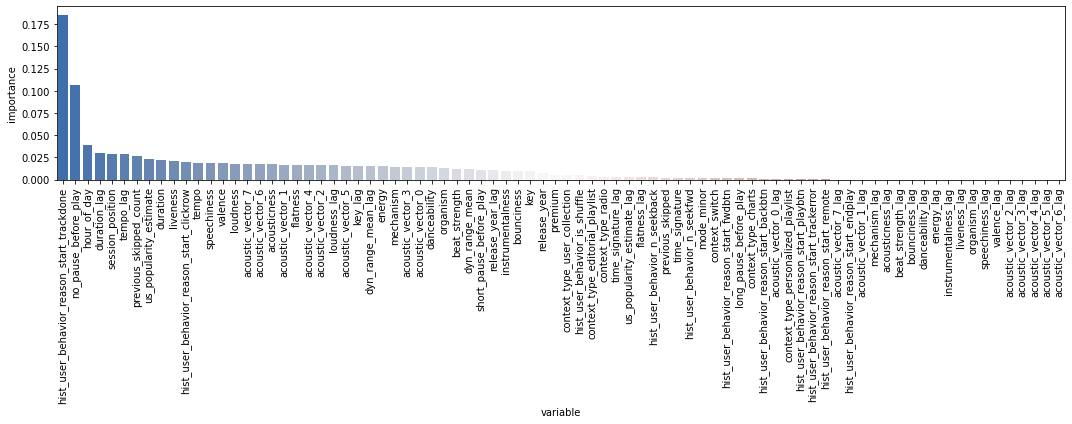

In [ ]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

model = RandomForestRegressor()
model.fit(X_train, y_train)
importance = model.feature_importances_

res = list()
for k,v in zip(X_train.columns, importance):
    res.append(tuple([k,v]))

res.sort(key = lambda x: x[1], reverse=True)
res = pd.DataFrame(res, columns=["variable", "importance"])

plt.figure(figsize=(15,6))
sns.barplot(x=res["variable"], y=res["importance"], palette="vlag")
plt.xticks(rotation=90)
plt.tight_layout()


## Model Selection
Now we will apply different models to find the best preformance. 

## Logistic Regression From Scratch

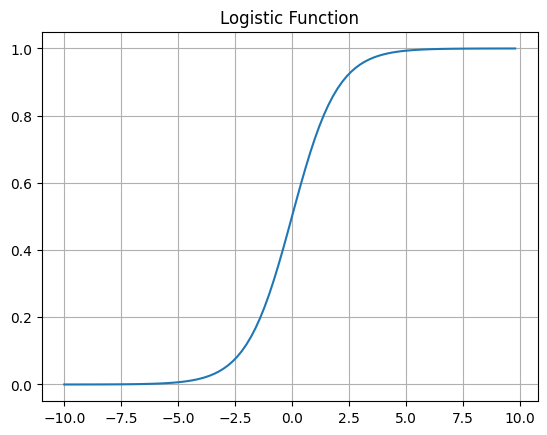

In [14]:
def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a

x = np.arange(-10., 10., 0.2)
sig = sigmoid(x)
plt.grid(True)
plt.title("Logistic Function")
plt.plot(x, sig)
plt.show()

In [15]:
class LogisticRegressionScratch:
    
    def __init__(self, learning_rate=0.1, epochs=10):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.w = None
        
    def standardize(self, X):
        X_std = preprocessing.normalize(X, axis=0)
        return np.c_[np.ones((X_std.shape[0],1)),X_std]

    # Update function: w = w - alpha * d/dw cost
    def sigmoid(self, x):
        # Returns predicted y value for given weight vector w and feature vector x
        return 1/(1+np.e**(-x))
    
    def loss(self, X, y):
        loss = 1
        m, n = X.shape
        for i in range(m):
            x_i = np.asarray(X.iloc[i])
            x_i = np.insert(x_i, 0, 0)
            o_i = self.sigmoid(self.w, x_i)
            y_i = y.iloc[i]
            loss *= ((o_i)**y_i) * ((1-o_i)**(1-y_i))
        return loss
    
    
    def fit(self, X, y):
        # Standardize X
        X = self.standardize(X)
        # Sets weight vector w 
        m, n = X.shape
        self.w = np.zeros((n, 1))
        params = np.zeros((n, 1))
        # while not converged
        for i in range(self.epochs):
            # Update function: w = w - alpha * d/dw cost
            sig = self.sigmoid(np.dot(X, params)) - np.reshape(np.asarray(y), (len(y), 1))
            params = params - self.learning_rate * np.dot(X.T, sig)
        self.w = params
    
    def predict(self, X_test):
        # Method takes in the testing data and weight vector
        # Returns the predicted y_hat vector
        m, n = X_test.shape
        y_hat = []
        X = self.standardize(X_test)
        # Get sigmoid of X_test with weights
        z = np.dot(X, self.w)
        for i in self.sigmoid(z):
            if (i <= 0.5):
                y_i_hat = 0
            else:
                y_i_hat = 1
            y_hat.append(y_i_hat)
        return y_hat

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_cm(y_test, y_hat_test):
    cf_matrix = confusion_matrix(y_test, y_hat_test)

    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

    ax.set_title('Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()

<ipython-input-15-43419919162a>:15: RuntimeWarning: overflow encountered in power
  return 1/(1+np.e**(-x))


The training accuracy for our logistic regression from Scratch model is  0.668
The testing accuracy for our logistic regression from Scratch model is  0.666


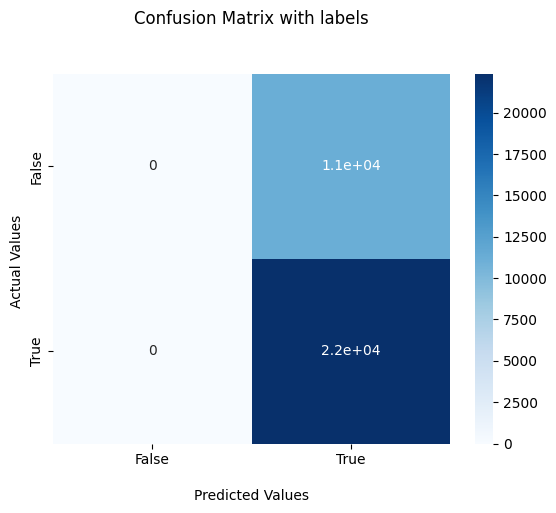

--- report ---
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     11231
           1       0.67      1.00      0.80     22345

    accuracy                           0.67     33576
   macro avg       0.33      0.50      0.40     33576
weighted avg       0.44      0.67      0.53     33576

--- auc ---
0.5


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
from sklearn.metrics import classification_report, roc_auc_score
model = LogisticRegressionScratch()
model.fit(X_train, y_train)

acc1 = accuracy_score(model.predict(X_train), y_train)
print("The training accuracy for our logistic regression from Scratch model is ", round(acc1, 3))
y_hat_test = model.predict(X_test)
acc2 = accuracy_score(y_hat_test, y_test)
print("The testing accuracy for our logistic regression from Scratch model is ", round(acc2, 3))
plot_cm(y_test, y_hat_test)

print('--- report ---')
print(classification_report(y_test, y_hat_test))

# print('--- params ---')
# print(clf.coef_, clf.intercept_)

print('--- auc ---')
print(roc_auc_score(y_test, y_hat_test))

## Logistic Regression in Sklearn library without Normalization
Let's first look at how our data preforms on sklearn's built-in version of the Logistic Regression model.

In [20]:
from sklearn.linear_model import LogisticRegression
builtin_model = LogisticRegression()
builtin_model.fit(X_train, y_train)
y_hat_train_sk = builtin_model.predict(X_train)
y_hat_test_sk = builtin_model.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The built-in logistic regression model has a training accuracy of  0.729
The built-in logistic regression model has a testing accuracy of  0.727


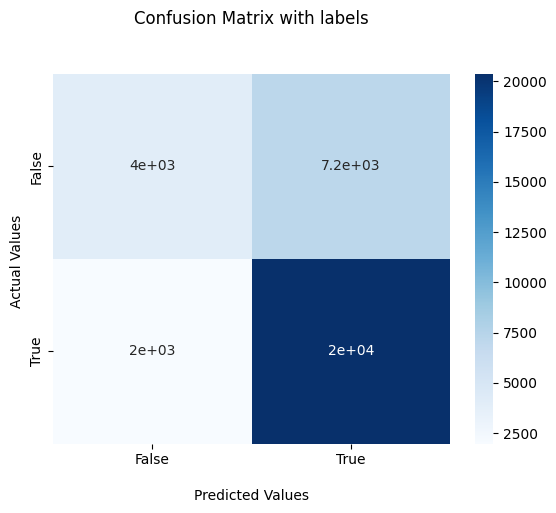

--- report ---
              precision    recall  f1-score   support

           0       0.67      0.36      0.47     11231
           1       0.74      0.91      0.82     22345

    accuracy                           0.73     33576
   macro avg       0.71      0.64      0.64     33576
weighted avg       0.72      0.73      0.70     33576

--- auc ---
0.6356212333765393


In [23]:
acc3 = accuracy_score(y_hat_train_sk, y_train)
print("The built-in logistic regression model has a training accuracy of ", round(acc3,3))
acc4 = accuracy_score(y_hat_test_sk, y_test)
print("The built-in logistic regression model has a testing accuracy of ", round(acc4, 3))
plot_cm(y_test, y_hat_test_sk)

print('--- report ---')
print(classification_report(y_test, y_hat_test_sk))

print('--- auc ---')
print(roc_auc_score(y_test, y_hat_test_sk))

### Logistic Regression in Sklearn library with Normalization

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The built-in logistic regression model has a testing accuracy of  0.801


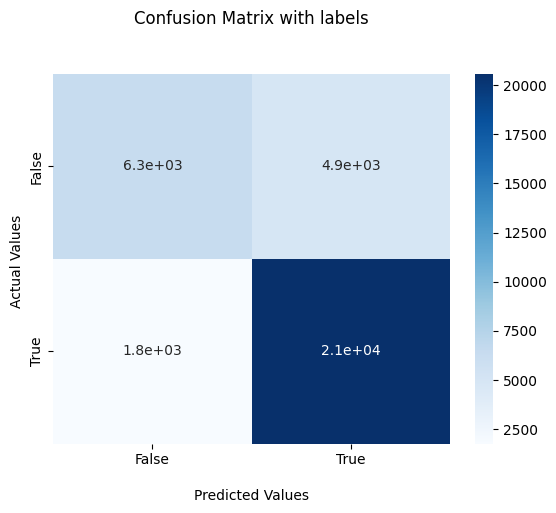

--- report ---
              precision    recall  f1-score   support

           0       0.78      0.56      0.65     11231
           1       0.81      0.92      0.86     22345

    accuracy                           0.80     33576
   macro avg       0.79      0.74      0.76     33576
weighted avg       0.80      0.80      0.79     33576

--- auc ---
0.7420243241568033


In [24]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import classification_report, roc_auc_score

clf = LR(
    penalty="l2", C=1.0, random_state=None, solver="lbfgs", max_iter=1000,
    multi_class='ovr', verbose=0,
)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

acc6 = accuracy_score(y_pred, y_test)
print("The built-in logistic regression model has a testing accuracy of ", round(acc6, 3))
plot_cm(y_test, y_pred)
print('--- report ---')
print(classification_report(y_test, y_pred))

# print('--- params ---')
# print(clf.coef_, clf.intercept_)

print('--- auc ---')
print(roc_auc_score(y_test, y_pred))

## Built-In Model Implementations

#### Light GBM Classifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
The training accuracy for our LGBMClassifier is  0.814
The testing accuracy for our LGBMClassifier is  0.811
--- report ---
              precision    recall  f1-score   support

           0       0.81      0.57      0.67     11231
           1       0.81      0.93      0.87     22345

    accuracy                           0.81     33576
   macro avg       0.81      0.75      0.77     33576
weighted avg       0.81      0.81      0.80     33576

--- auc ---
0.7498488275038846


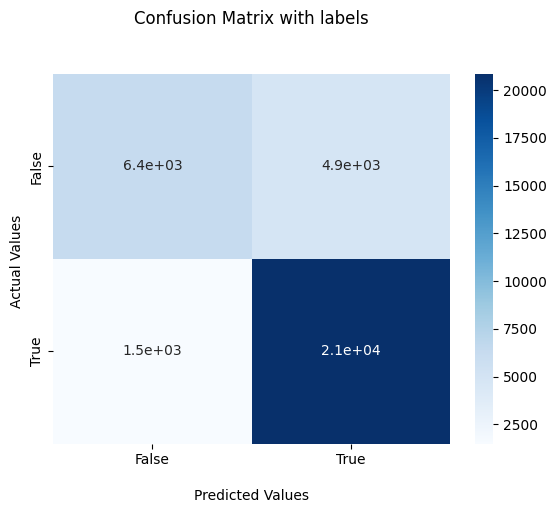

In [25]:
! pip install lightgbm
from lightgbm import LGBMClassifier
clf_lgbm = LGBMClassifier().fit(X_train, y_train)

acc1_light = accuracy_score(clf_lgbm.predict(X_train), y_train)
print("The training accuracy for our LGBMClassifier is ", round(acc1_light, 3))
y_hat_test = clf_lgbm.predict(X_test)
acc2_light = accuracy_score(y_hat_test, y_test)
print("The testing accuracy for our LGBMClassifier is ", round(acc2_light, 3))
print('--- report ---')
print(classification_report(y_test, y_hat_test))

# print('--- params ---')
# print(clf.coef_, clf.intercept_)

print('--- auc ---')
print(roc_auc_score(y_test, y_hat_test))
plot_cm(y_test, y_hat_test)

#### K-Nearest Neighbors Classifier

The training accuracy for our KNeighborsClassifier model is  0.753
The testing accuracy for our KNeighborsClassifier model is  0.63
--- report ---
              precision    recall  f1-score   support

           0       0.42      0.27      0.33     11231
           1       0.69      0.81      0.74     22345

    accuracy                           0.63     33576
   macro avg       0.55      0.54      0.54     33576
weighted avg       0.60      0.63      0.61     33576

--- auc ---
0.5414831630612604


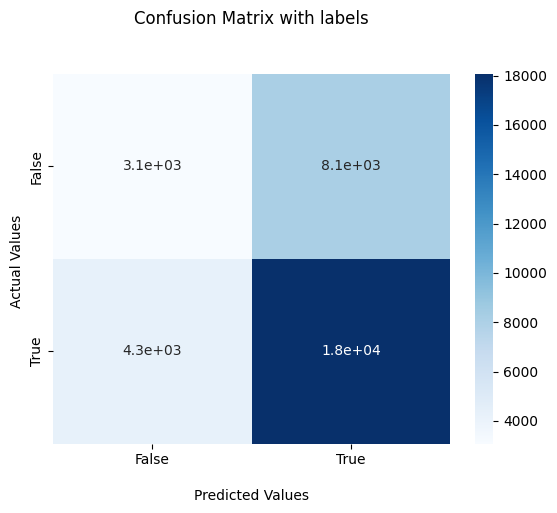

In [27]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

acc1_knn = accuracy_score(clf_knn.predict(X_train), y_train)
print("The training accuracy for our KNeighborsClassifier model is ", round(acc1_knn, 3))
y_hat_test_knn = clf_knn.predict(X_test)
acc2_knn = accuracy_score(y_hat_test_knn, y_test)
print("The testing accuracy for our KNeighborsClassifier model is ", round(acc2_knn, 3))
print('--- report ---')
print(classification_report(y_test, y_hat_test_knn))

# print('--- params ---')
# print(clf.coef_, clf.intercept_)

print('--- auc ---')
print(roc_auc_score(y_test, y_hat_test_knn))
plot_cm(y_test, y_hat_test_knn)

#### DNN Classifier

In [28]:
from tensorflow import keras
from tensorflow.keras import layers

#data parameter
num_classes = 2
input_shape = (82, 1)

X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print("x_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Flatten(),
        layers.Dense(num_classes, activation="sigmoid"),
    ]
)

model.summary()

batch_size = 128
epochs = 50

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
score = model.evaluate(X_test, y_test, verbose=0)

print("Final test loss:", score[0])
print("Final test accuracy:", score[1])


x_train shape: (134304, 82, 1)
134304 train samples
33576 test samples
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 82)                0         
                                                                 
 dense (Dense)               (None, 2)                 166       
                                                                 
Total params: 166
Trainable params: 166
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
945/945 [==============================] - 3s 3ms/step - loss: 1.9611 - accuracy: 0.6632 - val_loss: 0.5826 - val_accuracy: 0.7668
Epoch 2/50
945/945 [==============================] - 2s 2ms/step - loss: 0.6292 - accuracy: 0.7479 - val_loss: 0.6880 - val_accuracy: 0.7485
Epoch 3/50
945/945 [==============================] - 2s 2ms/step - loss: 0.6219 - accuracy: 0.7559